In [1]:
import os
print(f"Default directory:{os.getcwd()}")
os.chdir("..")
print(f"New directory:{os.getcwd()}")

Default directory:C:\Users\danie\OneDrive\Escritorio\Sabadell\1. Python Projects\linkedin_scraper\4. Analisis
New directory:C:\Users\danie\OneDrive\Escritorio\Sabadell\1. Python Projects\linkedin_scraper


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
import sqlite3
import plotly.express as px
from datetime import date

In [3]:
#================================= Load Data ====================================
con = sqlite3.connect(r".\2. Database\linkedin_jobpostings.db")
df = pd.read_sql_query("SELECT * FROM JOBPOSTINGS", con)
con.close()

In [4]:
df.head()

,createdAt,expireAt,company_name,job_title,jobposting,applies,views,company_urn,formattedIndustries,formattedJobFunctions,...,country,inferredBenefits,applyMethod,company_headquarters,n_employees,company_type,company_description,company_industries,company_specialties,company_website
0,2022-02-25 10:14:13,2022-08-24 11:16:55,NEW WORK SE,(Junior) Data Scientist,https://www.linkedin.com/jobs/view/2929594460,415,1201,28513290,nan,nan,...,es,[],{'com.linkedin.voyager.jobs.ComplexOnsiteApply...,Hamburg,1001-5000,Public Company,"We don’t see “New Work” as a buzzword. To us, ...",['Internet'],nan,https://new-work.se
1,2022-03-04 13:25:45,2022-08-31 14:27:37,Hispavista Labs,Data Scientist,https://www.linkedin.com/jobs/view/2951349599,55,341,11115388,nan,nan,...,es,[],{'com.linkedin.voyager.jobs.ComplexOnsiteApply...,Donostia - San Sebastián,11-50,Privately Held,HispaVista Labs is a R & D & I unit dedicated ...,['Information Technology and Services'],apache spark,https://hispavistalabs.com/
2,2022-03-05 05:09:04,2022-04-04 06:09:05,Vodafone,Specialist Data Scientist,https://www.linkedin.com/jobs/view/2948744193,34,348,1217,Information Services,Engineering,...,es,[],{'com.linkedin.voyager.jobs.OffsiteApply': {'a...,London,10001+,Public Company,"At Vodafone, we are known for our technology, ...",['Telecommunications'],Mobile & Fixed Telecommunications,http://www.vodafone.com/
3,2022-02-07 10:44:56,2022-03-09 10:48:23,"DEKRA Testing and Certification, S.A.U.",Data Scientist (H/M),https://www.linkedin.com/jobs/view/2907713138,32,360,283688,Information Technology & Services,Information Technology,...,es,['Medical insurance'],{'com.linkedin.voyager.jobs.OffsiteApply': {'a...,Spain,201-500,Privately Held,DEKRA has been active in the field of safety f...,['Telecommunications'],International Type Approvals Services,https://www.dekra-product-safety.com/en
4,2022-03-10 12:36:10,2022-04-09 13:36:21,Catenon,Senior Data Scientist,https://www.linkedin.com/jobs/view/2963902007,7,38,13521,Financial Services,Analyst,...,es,[],{'com.linkedin.voyager.jobs.SimpleOnsiteApply'...,Madrid,201-500,Privately Held,Catenon is the multinational company specializ...,['Staffing and Recruiting'],Staffing,http://www.catenon.com


In [6]:
df.columns.to_list()

['createdAt',
 'expireAt',
 'company_name',
 'job_title',
 'jobposting',
 'applies',
 'views',
 'company_urn',
 'formattedIndustries',
 'formattedJobFunctions',
 'formattedLocation',
 'formattedExperienceLevel',
 'text',
 'smartSnippets',
 'employmentStatus',
 'workRemoteAllowed',
 'country',
 'inferredBenefits',
 'applyMethod',
 'company_headquarters',
 'n_employees',
 'company_type',
 'company_description',
 'company_industries',
 'company_specialties',
 'company_website']

### EDA

In [18]:
top10_comp_df=df.groupby(by=["company_name"], as_index=False).size().nlargest(n=10, columns="size").reset_index(drop=True)

In [19]:
top10_comp_df

,company_name,size
0,Amazon,52
1,GMV,17
2,HP,15
3,Datadog,11
4,Accenture España,10
5,Canonical,9
6,Capgemini Engineering,9
7,Michael Page,9
8,Domestika,8
9,Meta,8


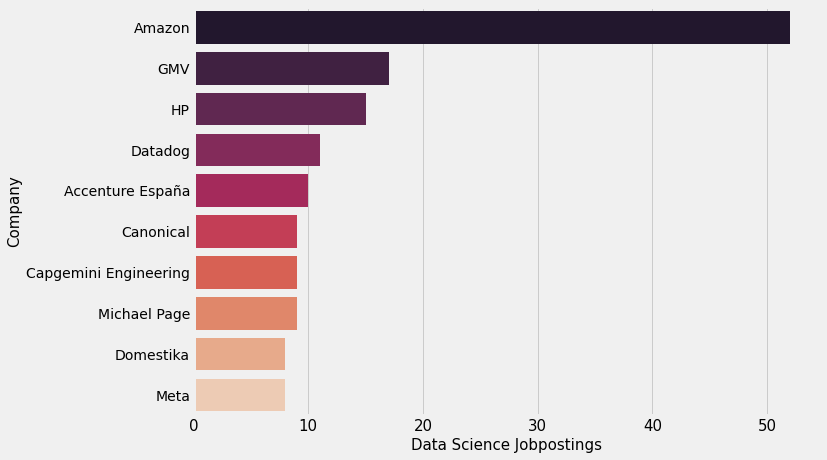

In [31]:
plt.figure(figsize=(10,7))
sns.barplot(data=top10_comp_df,
            y="company_name",
            x="size",
            palette="rocket"
           )

plt.yticks(size=14)
plt.ylabel("Company",size=15)
plt.xlabel("Data Science Jobpostings",size=15)
plt.xticks(size=15)
plt.show();

#### Skills

In [80]:
skills= {
        "Python": "python|Python|PYTHON",
        "R": "\sR\s",
        "SAS": "SAS",
        "Cloud": "Azure|AWS|SageMaker|Google Cloud|GCP",
        "ML": "machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning",
        "NLP": "NLP|nlp|Natural Language Processing",
        "Big Data":  "Big Data|Hadoop|Spark|Hive",
        "SQL": "SQL|sql"
        }


n_jobpostings=df.shape[0]

In [81]:
skills_df=pd.DataFrame(columns=["skill","pct_postings"])

for k,v in skills.items():
    n=df[df.text.str.contains(v)].shape[0]/n_jobpostings
    skills_df=skills_df.append({"skill":k, "pct_postings": n},
                               ignore_index=True)
    
skills_df.sort_values(by="pct_postings",ascending=False, inplace=True)

In [83]:
skills_df

,skill,pct_postings
4,ML,0.650138
0,Python,0.595041
7,SQL,0.442149
3,Cloud,0.316804
6,Big Data,0.224518
1,R,0.077135
5,NLP,0.073003
2,SAS,0.045455


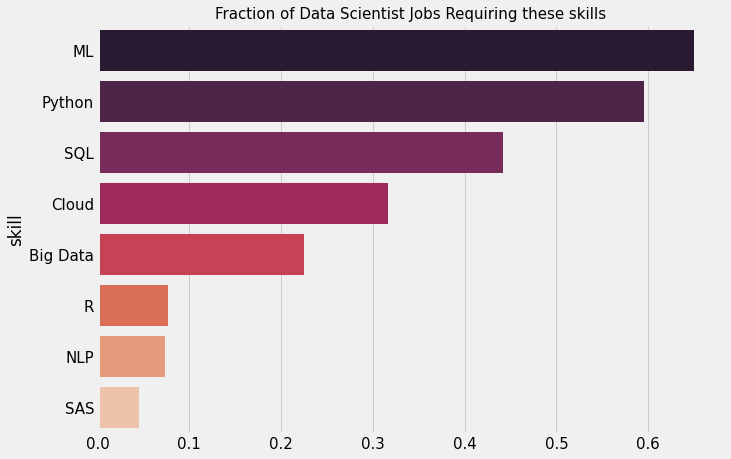

In [82]:
plt.figure(figsize=(10,7))
sns.barplot(data=skills_df,
            x="pct_postings",
            y="skill",
            palette="rocket")
plt.title("Fraction of Data Scientist Jobs Requiring these skills",size=15)
plt.xlabel(None)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show();

https://towardsdatascience.com/analysis-of-data-science-and-ml-job-openings-in-usa-eda-e9191dddef15